The function $\frac{\sin x}{x}$ which cropped up in the proofs of the derivatives of [$\sin$](2. Using the definition to derive some differentiation rules.ipynb#sin) and [$\cos$](2. Using the definition to derive some differentiation rules.ipynb#sin) is an important function in signal processing and the theory of Fourier transforms. It's actually called the *unnormalized [sinc function](https://en.wikipedia.org/wiki/Sinc_function)*, where *sinc* is an abbreviation for the *cardinal sine function*.

We've [proved](2c. Some geometric proofs.ipynb) that $\lim\limits_{x \to 0}\frac{\sin(x)}{x}=1$, so the unnormalized sinc function is usually defined as:

$\DeclareMathOperator{\sinc}{sinc}
\sinc(x)=\begin{cases} 
      1 & x = 0 \\
      \frac{\sin(x)}{x} & \text{otherwise} 
   \end{cases}$
   
I plotted a small section of this function as an illustration during the above the proofs, but what does the rest of the function look like? Well, it'd be easy to calculate it and plot it out but it's good practice to reason about functions like this first...

-----

Think of it as the product of two functions: $\sin(x)$ and $\frac{1}{x}$.

We know what $\sin(x)$ looks like. It's a periodic function (with period $2\pi$), ranging between $1$ and $-1$, representing the vertical height of a point on the unit circle with angle $x$ radians. So, it's $0$ when $x=0$, $1$ when $x=\frac{\pi}{2}$, $0$ when $x=\pi$, $-1$ when $x=\frac{3\pi}{2}$, ...

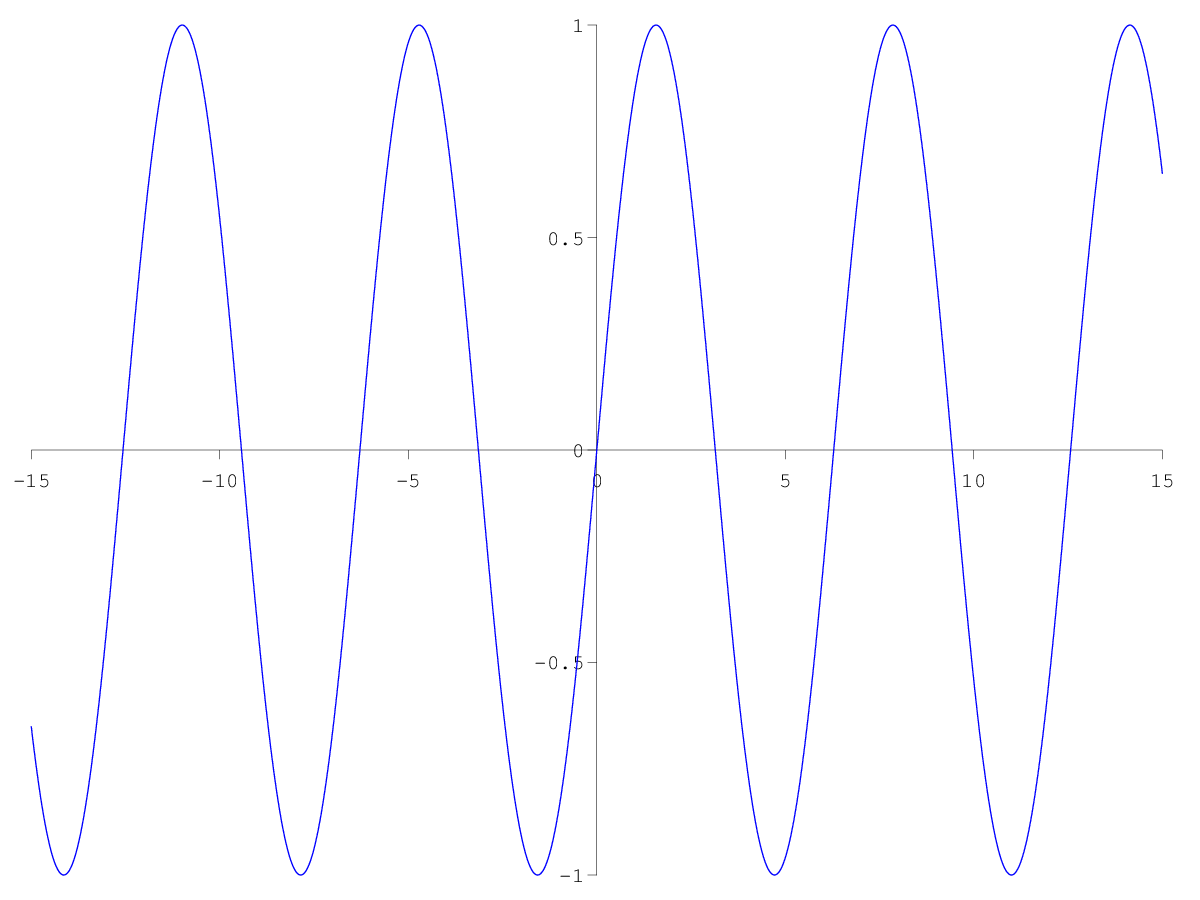

In [1]:
x=[-15:0.01:15];
y=sin(x);
plot(x,y,'LineWidth',2,'color','b');

set(gca, "xaxislocation", "zero");
set(gca, "yaxislocation", "zero");
set(gca, "box", "off");

For $\frac{1}{x}$, obviously it equals $1$ when $x=1$ and, as $x$ increases $\gt 1$ it's a fraction getting quite rapidly closer and closer to 0...

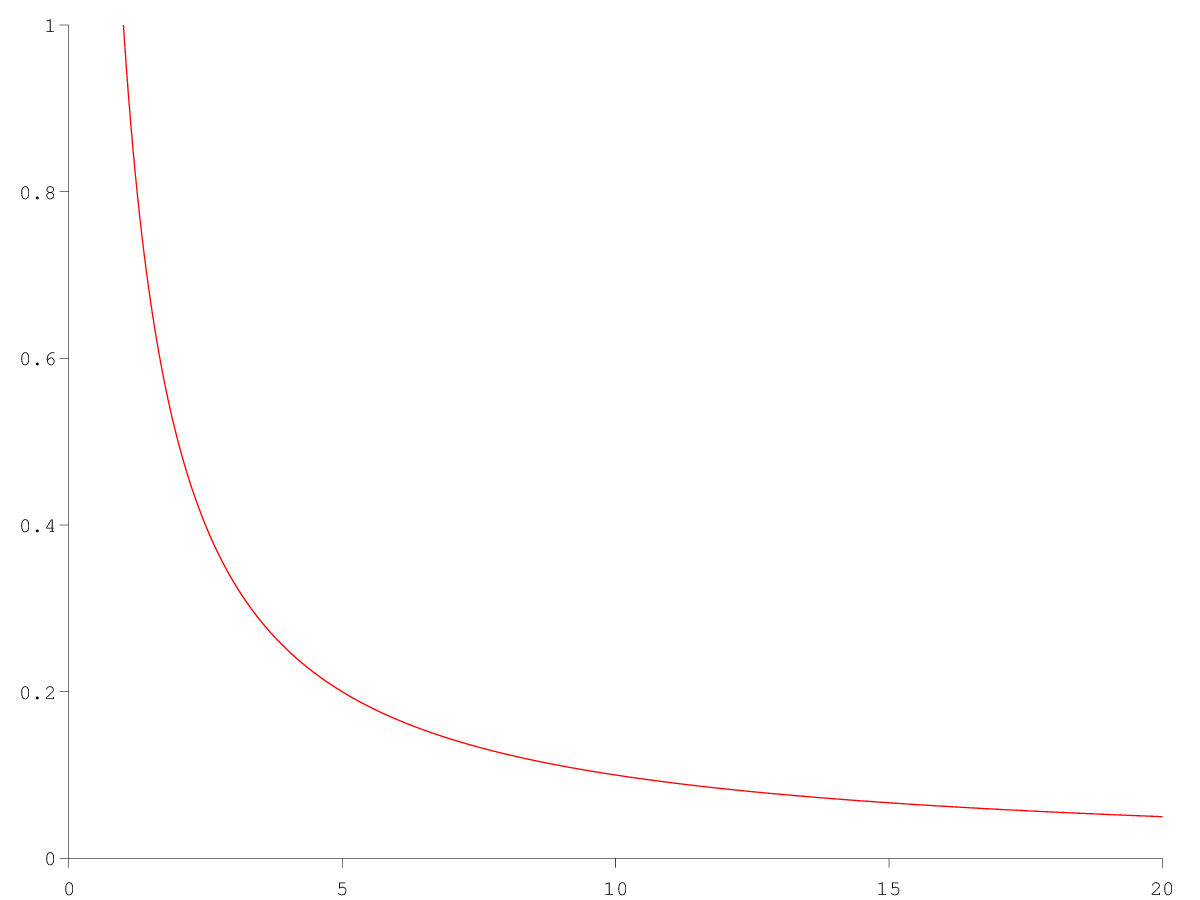

In [2]:
x=[1:0.01:20];
y=1 ./ x;
plot(x,y,'LineWidth',2,'color','r');

set(gca, "xaxislocation", "zero");
set(gca, "yaxislocation", "zero");
set(gca, "box", "off");

For positive values of $x \lt 1$ it rapidly increases approaching positive infinity in the limit as $x \to 0$

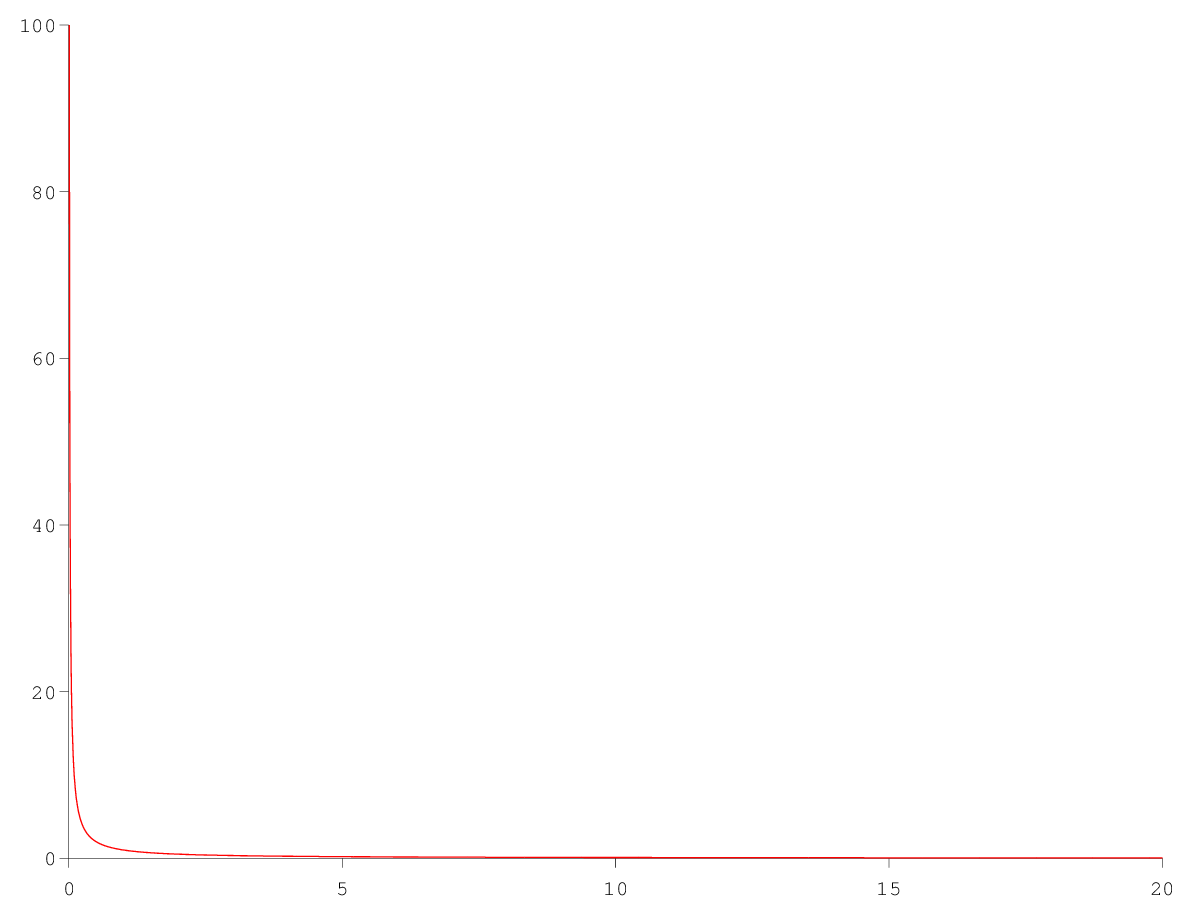

In [4]:
x=[0.01:0.01:20];
y=1 ./ x;
plot(x,y,'LineWidth',2,'color','r');

set(gca, "xaxislocation", "zero");
set(gca, "yaxislocation", "zero");
set(gca, "box", "off");

The values for $\frac{1}{x}$ when $x \lt 0$ are exactly the same but with negative values...

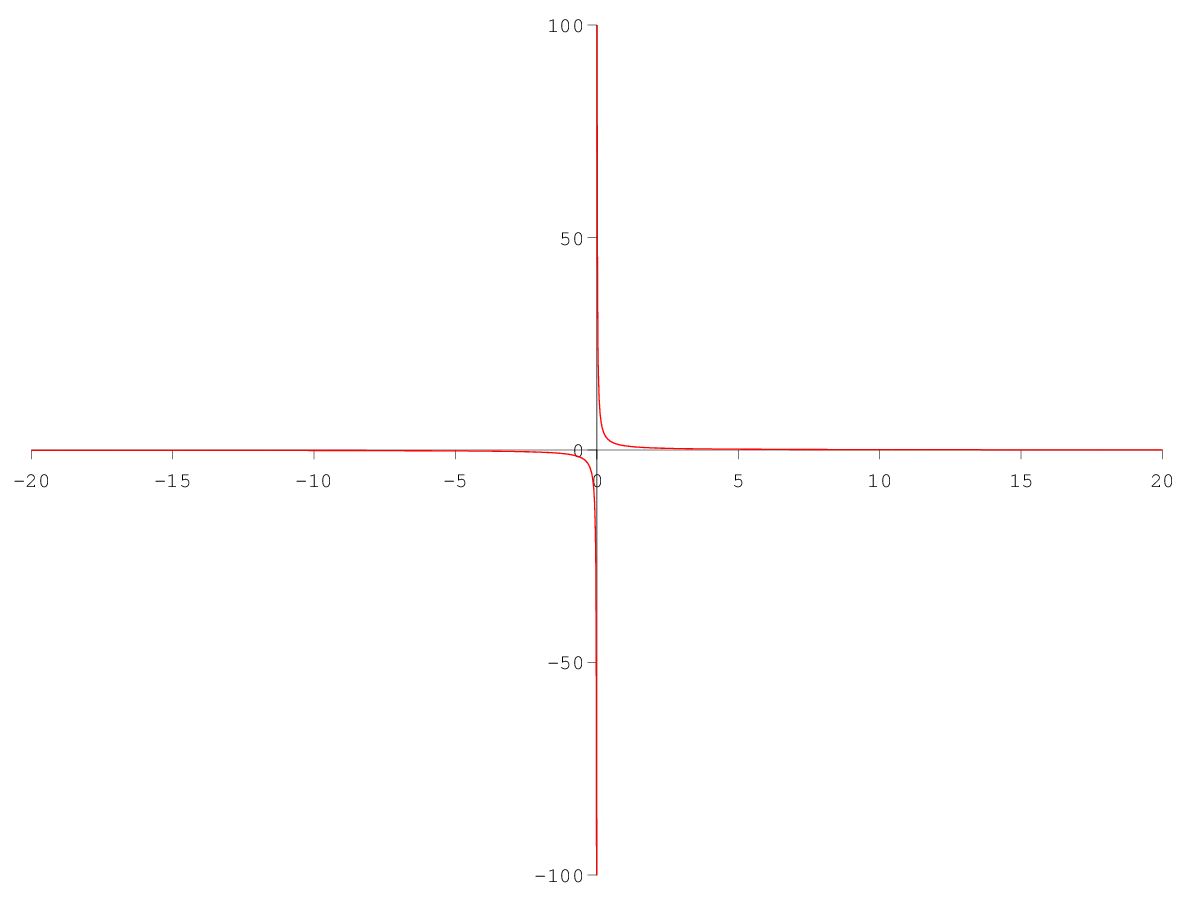

In [10]:
posx=[0.01:0.01:20];
negx=[-20:0.01:-0.01];

posy=1 ./ posx;
negy=1 ./ negx;

plot(posx,posy,'LineWidth',2,'color','r', ...
     negx,negy,'LineWidth',2,'color','r');

set(gca, "xaxislocation", "zero");
set(gca, "yaxislocation", "zero");
set(gca, "box", "off");

Putting these two functions together we can reason about when the function $\frac{\sin x}{x}$ will be positive, when it will be negative and when it will cross the x-axis...

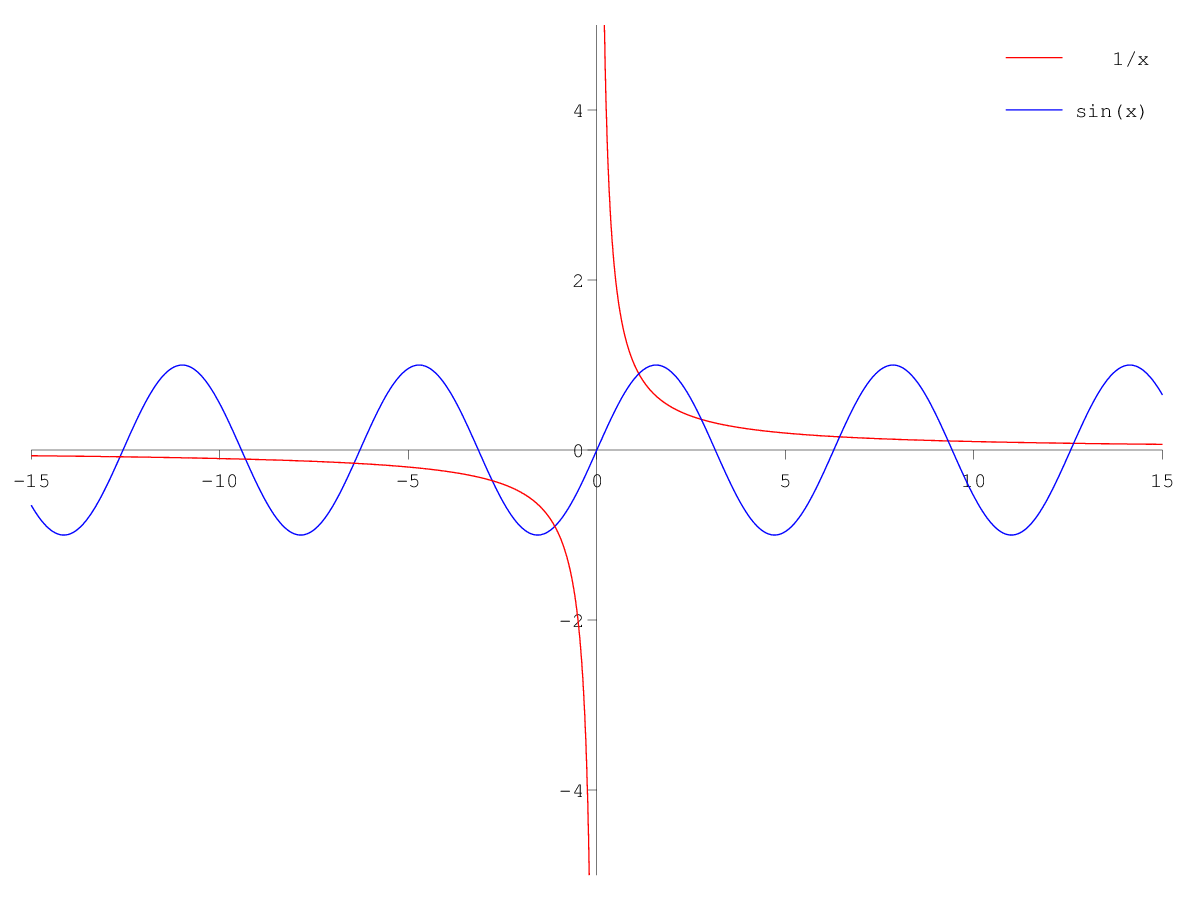

In [13]:
posx=[0.01:0.01:20];
negx=[-20:0.01:-0.01];

posy=1 ./ posx;
negy=1 ./ negx;

x=[-15:0.01:15];
y=sin(x);

plot(posx,posy,'LineWidth',2,'color','r', ...
     x,y,'LineWidth',2,'color','b',...
     negx,negy,'LineWidth',2,'color','r');

set(gca, "xaxislocation", "zero");
set(gca, "yaxislocation", "zero");
set(gca, "xlim", [-15 15]);
set(gca, "ylim", [-5 5]);
set(gca, "box", "off");

legend ({'1/x','sin(x)'});
legend boxoff;

![](img\sinc-reasoning.jpg)

From this you can see that the *sinc* function will:

* cross the x-axis at the same points as the *sin* function (except for when $x=0$, where it is defined to be equal to $1$)
* have the same sign as the *sin* function when $x \gt 0$
* have the opposite sign as the *sin* function when $x \lt 0$
* have oscillations that decrease in magnitude as $x$ increases in both positive and negative directions (as we multiply the *sin* function by a smaller and smaller value for $x \gt 0$ and by values of the same magnitude but opposite sign for $x \lt 0$).
* be an *even* function

This should give you a reasonable idea of what the *sinc* function looks like. But, there's one other piece of information you could use which would allow you to draw it fairly accurately by hand...

We know the range of the oscillations in the *sin* function: $-1 \le \sin(x) \le 1$. So, the range of the oscillations in the *sinc* function must be: $-\frac{1}{x} \le \frac{\sin(x)}{x} \le \frac{1}{x}$.

So, if you overlaid $\sin(x)$, $\frac{1}{x}$, and, $-\frac{1}{x}$ you could draw the *sinc* function starting at $1$ when $x=0$, crossing the x-axis at the same points as the *sin* function with the peaks & troughs of each oscillation touching the $\frac{1}{x}$, and, $-\frac{1}{x}$ lines...

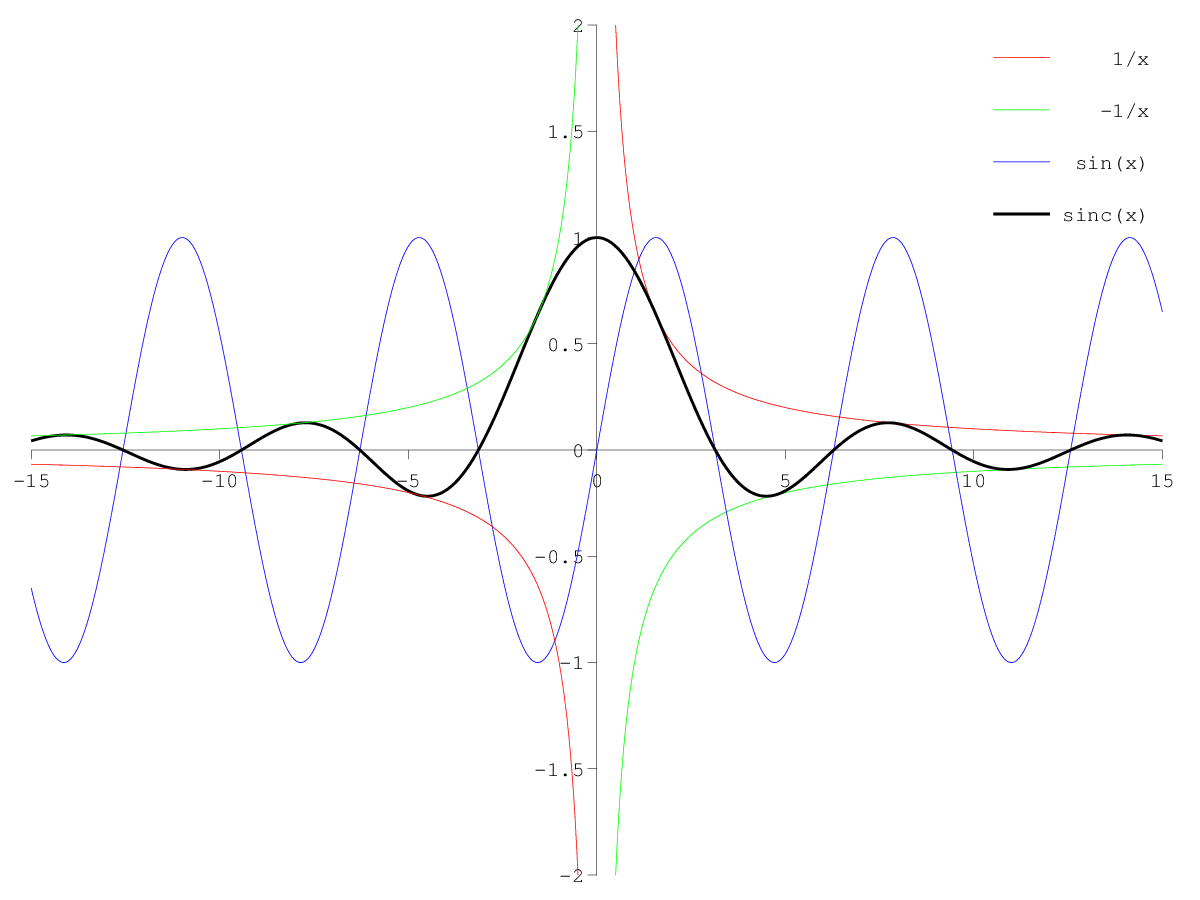

In [8]:
posx=[0.01:0.01:20];
negx=[-20:0.01:-0.01];

inverse1 = 1 ./ posx;
inverse2 = 1 ./ negx;

negInverse1 = inverse1 .* (-1);
negInverse2 = inverse2 .* (-1);

x=[-15:0.01:15];
sinx=sin(x);

sincx=sinx ./ x;

plot(posx,inverse1,'LineWidth',1,'color','r', ...
     posx,negInverse1,'LineWidth',1,'color','g', ...
     x,sinx,'LineWidth',1,'color','b',...
     x,sincx,'LineWidth',5,'color','k',...
     negx,inverse2,'LineWidth',1,'color','r',...
     negx,negInverse2,'LineWidth',1,'color','g');

set(gca, "xaxislocation", "zero");
set(gca, "yaxislocation", "zero");
set(gca, "xlim", [-15 15]);
set(gca, "ylim", [-2 2]);
set(gca, "box", "off");

legend ({'1/x','-1/x','sin(x)','sinc(x)'});
legend boxoff;

And finally, here it is on its own...

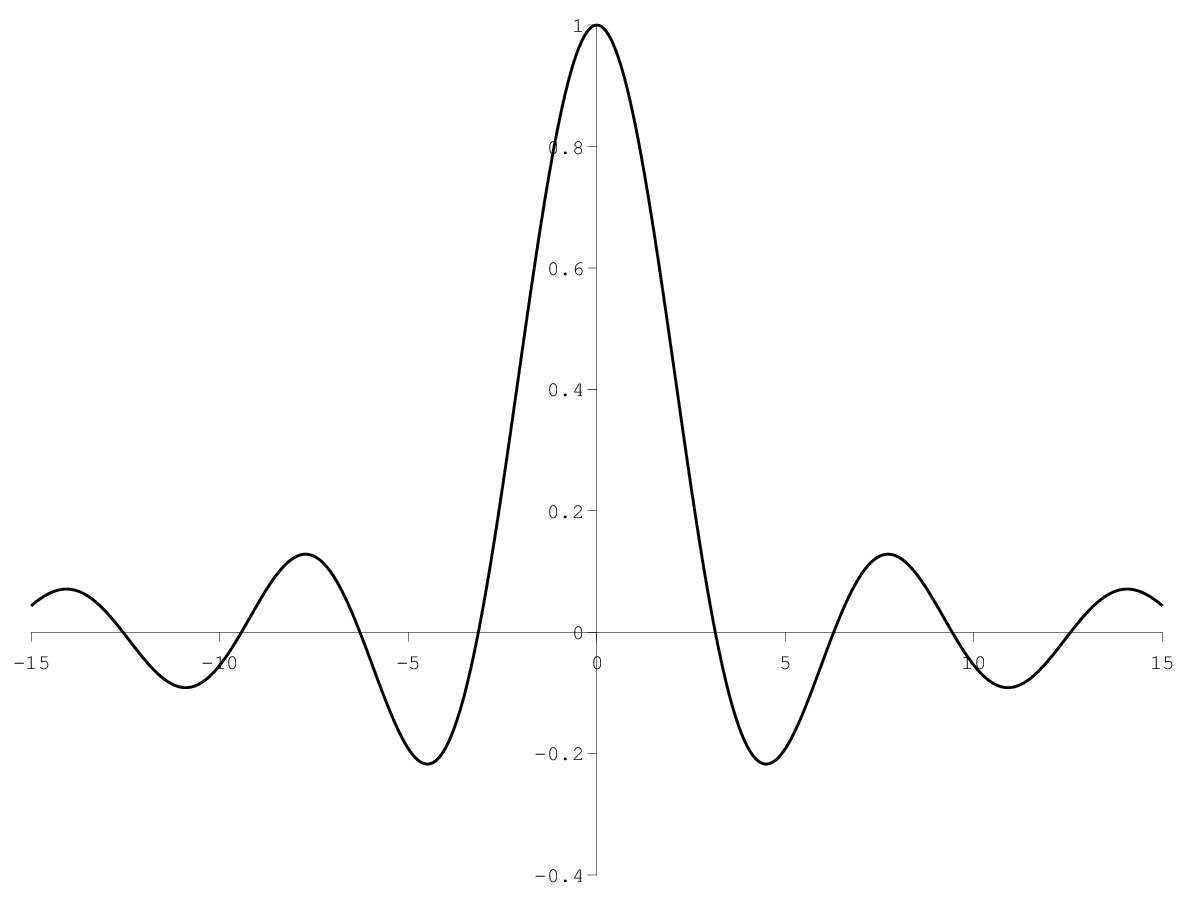

In [9]:
x=[-15:0.01:15];
y=sin(x) ./ x;

plot(x,y,'LineWidth',5,'color','k');

set(gca, "xaxislocation", "zero");
set(gca, "yaxislocation", "zero");
set(gca, "box", "off");